In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
combi = train.append(test, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [6]:
#Remove twitter handles(@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

#### Removing Punctutation Numbers, and special characters

In [7]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

#### Removing Short Words

In [8]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


#### Tokenization

In [10]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

#### Stemming

In [11]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [12]:
for i in range(len(tokenized_tweet)):
    print(tokenized_tweet[i])
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

['hour', 'late', 'your', 'listeria', 'recal', 'second', 'trimest', 'wife', 'just', 'salad', '#shouldicancel']
['#model', 'love', 'take', 'with', 'time']
['hour', 'tonight', 'go', 'epic', '#cultureclash']
['know', '#suitcas', '#pack']
['love', 'even', 'with', 'louis', 'stuf', 'snuggl', '#love', '#friend', '#besti']
['love', 'face', '#bat', '#love', '#pet', '#videooftheday', '#videoinstagram', '#photograf']
['love', 'watch', 'bodi', 'chang', 'wait', 'test', 'week', '#gain']
['happi', '#behappi', '#sefeliz', '#domingo', '#sunday', '#instagram', '#instamo', '#instamood', '#instalik', '#smile']
['yesterday', '#ripchristina', 'today', '#prayfororlando', 'both', 'those', 'thing', 'happen', 'orlando', 'what', 'wrong', 'with', 'those', 'peopl']
['follow', '#souhilabenlachhab', '#love', '#instagood', '#tbt', '#follow', '#cute', '#photooftheday']
['again', 'that', 'benefit', 'enough', 'them']
['word', 'need', '#canonbeach', '#oregoncoast', '#pnw', '#ocean', '#peac', '#content', '#lifeisgood']
['q


['good', '#grung', '#natur', '#rad', '#awsom', '#sun', '#photo', '#iphon', '#nofilt', '#eah']
['#sfmta', 'most', 'tranquil', 'amus', 'muni', 'friday', '#sfmta', 'muni']
['awesom', 'freddi', 'beach', '#fit', 'inspir', '#eatclean', '#amaz', '#sun', '#fit', 'inspir']
['need', 'thi', '#irrit', '#annoy', '#bother', '#wordsofwisdom', '#meyend', '#peac', '#quot', '#follow']
['just', 'have', 'realli', 'wonder', 'friend', 'good', '#okaywhatdididotodeservethi', '#lucki', '#bless']
['love', '#play', 'well', 'done']
['that', '#fridayfeel', 'sooooooo', 'good', '#weekend']
['have', 'drastic', 'social', 'break', 'down', 'thi', 'countri', '#poor', 'ineffici', 'leadership', '#wrong', 'valu', '#disrespect']
['panel', 'seat', '#flmedicaid', 'here']
['look', 'schedul', 'see', 'that', 'there', '#survivor', 'tonight']
['know']
['like', 'your', 'lover', 'product', 'ironi', 'real', 'loser', 'find', 'some']
['align', 'suck', 'butt', 'align', 'truck', 'time', 'alreadi', 'year']
['will', 'pass', 'bunni', 'boile


['haha', 'say', 'that', 'becaus', 'think', 'male', 'know', 'femal', '#ponchobot']
['agre', 'with']
['line', 'idiot', 'like', 'most', 'human', 'male', 'same', 'line', 'about', 'femal', 'would', 'caus', 'uproar']
['#ase', 'bull', 'will', 'domin', 'your', 'bull', 'will', 'direct', 'whatev', 'want', 'when']
['want', 'live', 'life', 'goal', 'peopl', 'thing']
['look', 'forward', '#festiv', '#ticket', '#deichbrand', '#germani', '#cuxhaven', '#rock', '#metal']
['were', 'spiritu', 'religi', 'life', 'wouldn', 'have', 'question', 'like', 'that']
['rehears', 'black', 'tension', '#grate', '#passion', '#love', '#dream', '#life', '#danc']
['glad', 'final', 'again', '#friend', '#friendfromhighschool', '#bowl', '#thank']
['go', 'with', 'good', 'mate', '#southroad', '#food', '#drink', '#mate', '#calm']
['happi', 'saturday', 'everyon', '#paytim', '#saturday', '#outwithfriend', '#antoniomuniz']
['word', '#prayforolando', 'ness', '#coward', '#love', '#peac']
['listen', 'most', 'beauti', 'best', 'friend', 

In [13]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#### Understand the common words used in the tweets : WordCloud

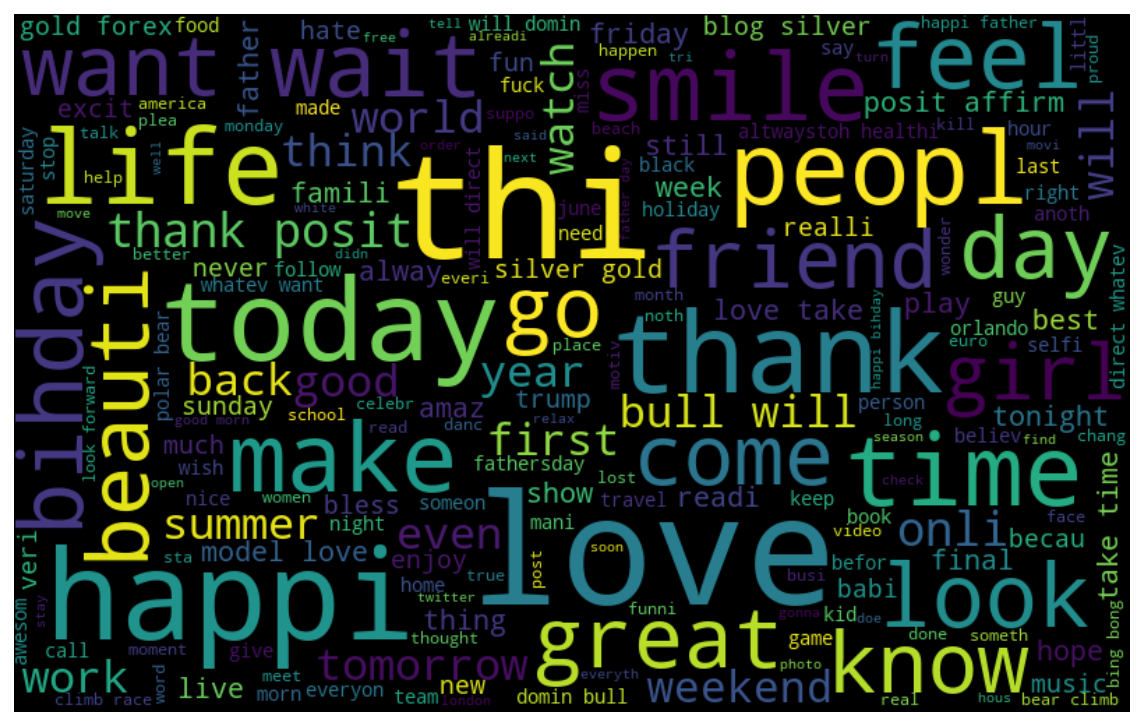

In [14]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Word in non racist/sexist tweets

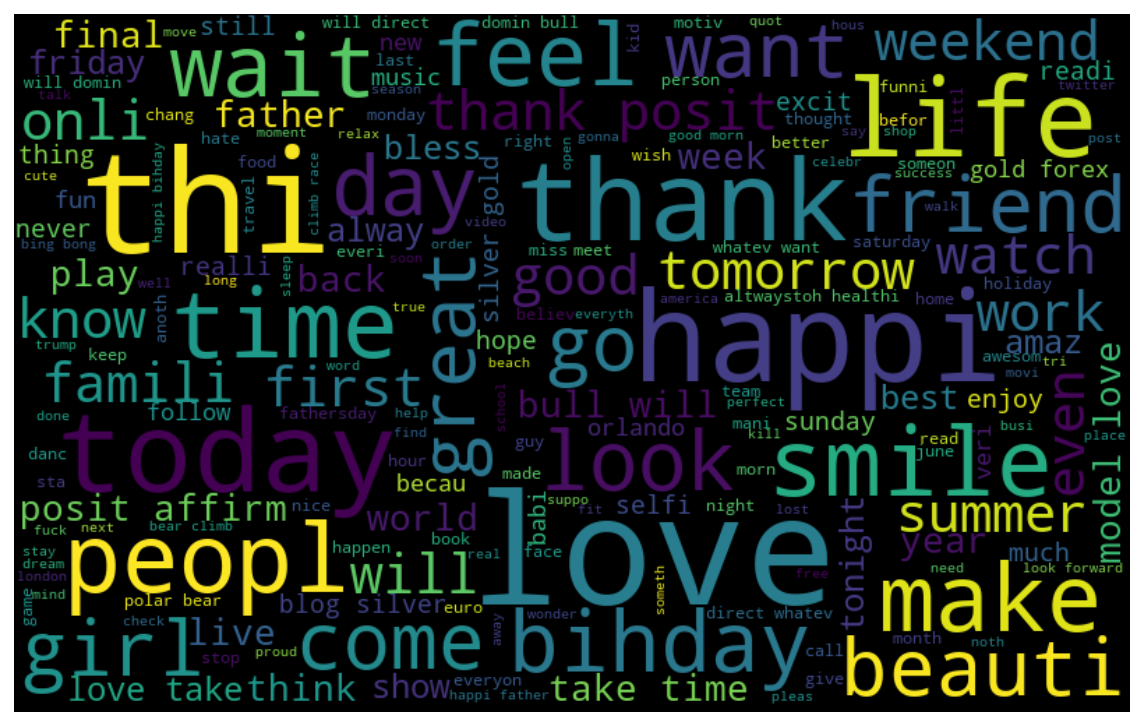

In [15]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Word in racist/sexist tweets

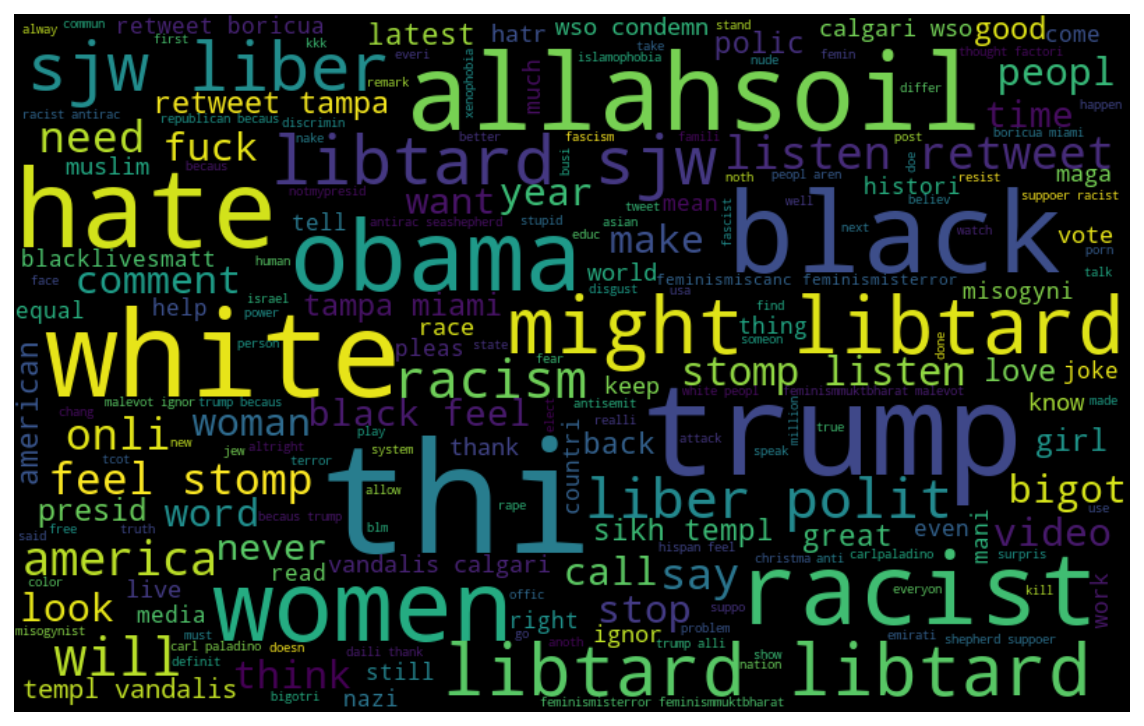

In [16]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [18]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

#### Non-Racist/Sexist Tweets

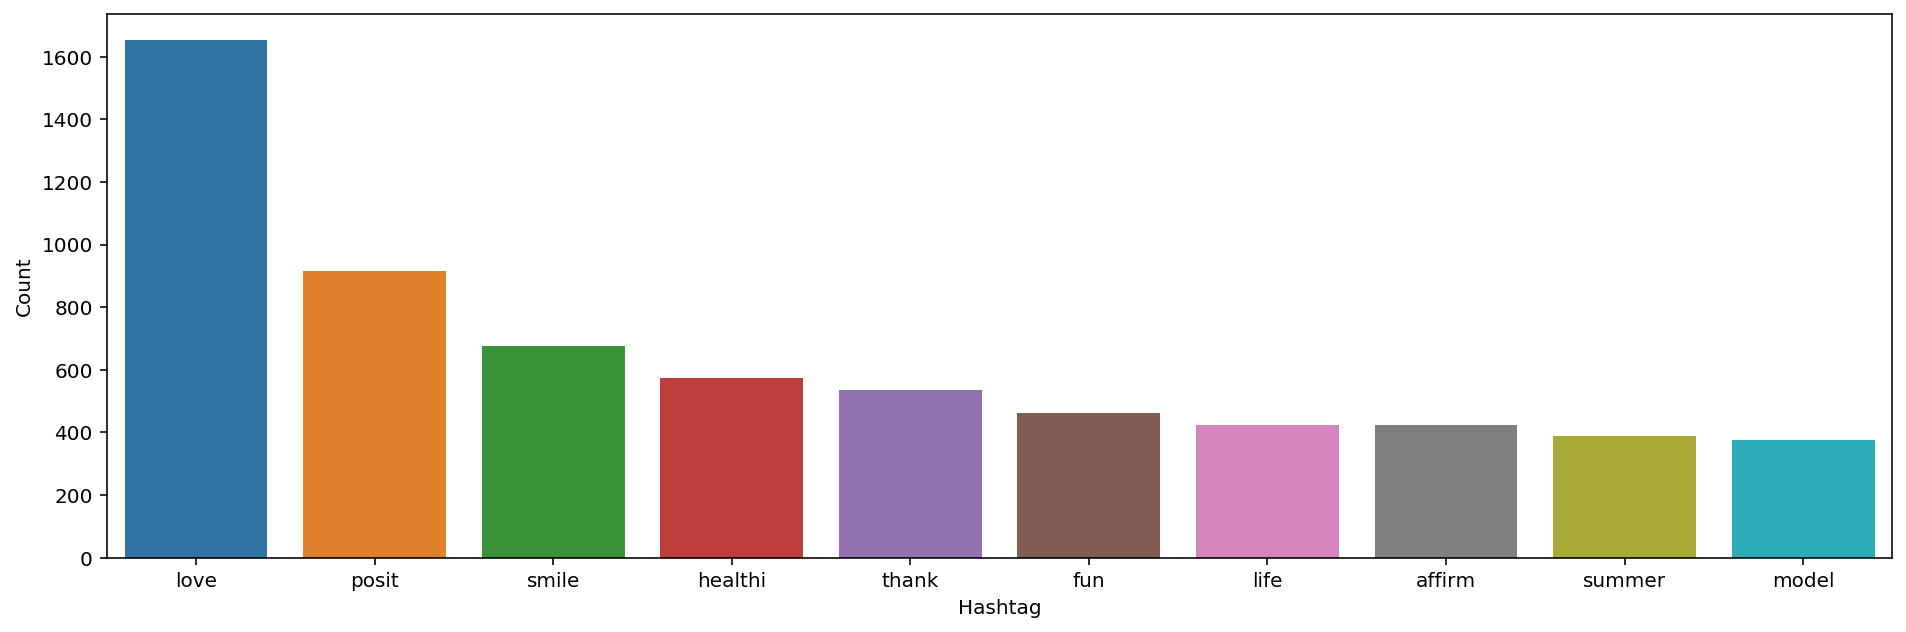

In [20]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Racist/Sexist Tweets

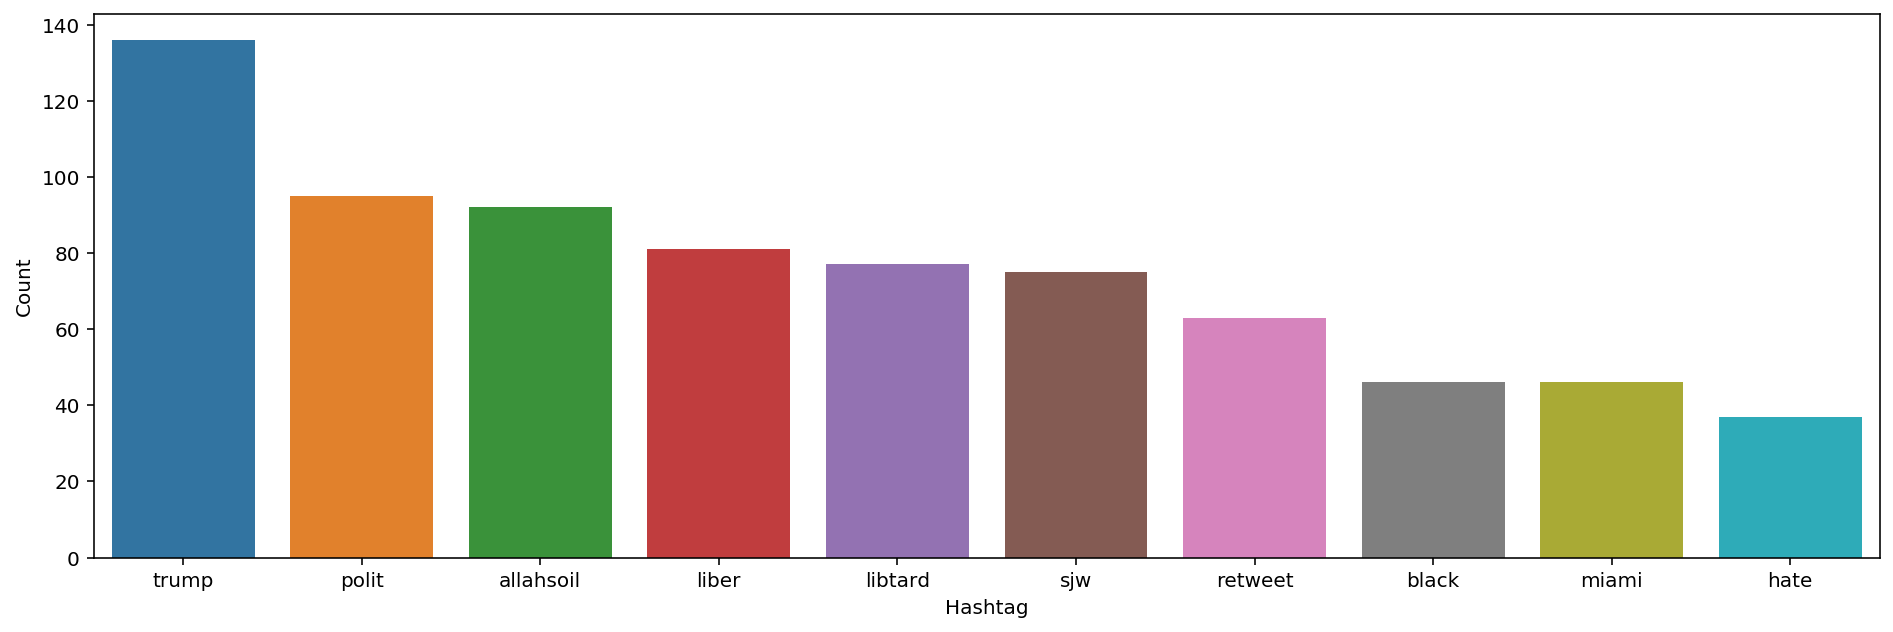

In [22]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

#### Build model using Bag-of-Words features

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832